In [319]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [320]:
file = 'Los_Feliz_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [321]:
path = os.path.join(location, file)

In [322]:
# bring in our dataframe

Los_Feliz_df = pd.read_csv(path, index_col='PARCEL')
Los_Feliz_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0


In [323]:
# drop any nulls

Los_Feliz_df = Los_Feliz_df.dropna()

In [324]:
len(Los_Feliz_df)

4411

In [325]:
# Change the datatype of these two columns into ints

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'].astype(int)
Los_Feliz_df['EFFYRBLT'] = Los_Feliz_df['EFFYRBLT'].astype(int)

In [326]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Los_Feliz_df = Los_Feliz_df[~Los_Feliz_df['SITEADDRESS'].str.contains('#')]
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0


In [327]:
len(Los_Feliz_df)

3891

In [328]:
# Now drop the SiteAddress column
Los_Feliz_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [329]:
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,0,0,1,764570,611657,152913,0,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,0,0,1,963046,770437,192609,0,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,0,0,1,1371383,906772,464611,0,0,...,3,0,0,0,0,0,0,0,0,0


In [330]:
# Remove the columns we know don't add much:

Los_Feliz_df = Los_Feliz_df.drop(['NOSTORY', 'POOL', 'MAIL OUTSIDE CA?', 'TITLECO1',
                                  'AIRMTHOD', 'FIREPLCE', 'PATIO', 'ASSDOTHR',
                                  'EXEMPTCD', 'EXMPTAMT', 'PCNTIMPD', 'DININGRM', 
                                  'BLDGCOND', 'MULTIPARCEL', 'FAMILYRM', 'LENDER1',
                                  'LOANTYPE1', 'HEATMTHD', 'FOUNDATN', 'ROOFMAT', 
                                  'GRGTYPE', 'BLDGMAT', 'TOTUNITS', 'QUALCLAS','VIEW'], axis=1)

In [331]:
Los_Feliz_df

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,ASSDTOTAL,ASSDLAND,ASSDSTCT,TAXAMT,DOCDATE_YEAR,PRICE,LOANAMOUT1,YEARBLT,EFFYRBLT,LOTSQFT,TOTALSF,BEDROOMS,BATHROOMS,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,
5590007001,0,0,0,764570,611657,152913,9147,2012,735000,0,1921,1921,4499,1196,2,1,0
5591005003,0,0,0,963046,770437,192609,11705,2013,930000,0,1928,1928,4706,2349,3,2,1
5592009038,1,0,0,1371383,906772,464611,16696,2013,1310000,0,1939,1939,6664,2615,3,3,0
5580029001,0,0,1,3939169,2954377,984792,47342,2014,3880000,0,1941,1941,39558,3363,4,5,0
5588011006,0,0,0,1945117,1421350,523767,23588,2014,1975000,0,1924,1924,10045,3185,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592016027,0,0,1,1185261,602562,582699,14382,1999,855000,0,1938,1938,7480,3132,4,4,0
5592018027,0,0,1,2005946,1226940,779006,24524,1999,1545000,1000000,1931,1931,23962,4476,4,4,1
5592018029,0,0,0,863391,674747,188644,10636,1999,665000,500000,1936,1936,20178,2953,3,3,0


In [332]:
Los_Feliz_df['PARCEL_1'] = Los_Feliz_df.index.values

In [333]:
Los_Feliz_df

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,ASSDTOTAL,ASSDLAND,ASSDSTCT,TAXAMT,DOCDATE_YEAR,PRICE,LOANAMOUT1,YEARBLT,EFFYRBLT,LOTSQFT,TOTALSF,BEDROOMS,BATHROOMS,Did it sell?,PARCEL_1
PARCEL,,,,,,,,,,,,,,,,,,
5590007001,0,0,0,764570,611657,152913,9147,2012,735000,0,1921,1921,4499,1196,2,1,0,5590007001
5591005003,0,0,0,963046,770437,192609,11705,2013,930000,0,1928,1928,4706,2349,3,2,1,5591005003
5592009038,1,0,0,1371383,906772,464611,16696,2013,1310000,0,1939,1939,6664,2615,3,3,0,5592009038
5580029001,0,0,1,3939169,2954377,984792,47342,2014,3880000,0,1941,1941,39558,3363,4,5,0,5580029001
5588011006,0,0,0,1945117,1421350,523767,23588,2014,1975000,0,1924,1924,10045,3185,4,5,0,5588011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592016027,0,0,1,1185261,602562,582699,14382,1999,855000,0,1938,1938,7480,3132,4,4,0,5592016027
5592018027,0,0,1,2005946,1226940,779006,24524,1999,1545000,1000000,1931,1931,23962,4476,4,4,1,5592018027
5592018029,0,0,0,863391,674747,188644,10636,1999,665000,500000,1936,1936,20178,2953,3,3,0,5592018029


In [334]:
Los_Feliz_df.columns

Index(['Owned by Trust?', 'Owned by Business?', 'MAIL DIFFERENT FROM SITE?',
       'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT', 'TAXAMT', 'DOCDATE_YEAR', 'PRICE',
       'LOANAMOUT1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF', 'BEDROOMS',
       'BATHROOMS', 'Did it sell?', 'PARCEL_1'],
      dtype='object')

In [335]:
# Step 1: Create our X and y

y = Los_Feliz_df['Did it sell?']
X = Los_Feliz_df[['DOCDATE_YEAR', 'TOTALSF', 'ASSDSTCT', 'LOTSQFT', 'PRICE',
                  'ASSDLAND', 'TAXAMT', 'LOANAMOUT1', 'EFFYRBLT', 'YEARBLT',
                  'Owned by Trust?', 'BEDROOMS', 'BATHROOMS', 'Owned by Business?',
                  'MAIL DIFFERENT FROM SITE?', 'PARCEL_1']]

In [336]:
len(y)

3891

In [337]:
len(X)

3891

In [338]:
APN = Los_Feliz_df.index.values
APN

array([5590007001, 5591005003, 5592009038, ..., 5592018029, 5592021014,
       5592025013])

In [339]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [340]:
X_pca

array([[-3.92981396e+07, -4.40414326e+05,  3.88735718e+05],
       [-4.02970861e+07, -2.21169622e+05,  3.45264761e+05],
       [-4.13028579e+07,  1.87791922e+05,  3.24929520e+05],
       ...,
       [-4.13096467e+07, -3.92533291e+05, -2.48192353e+04],
       [-4.13127963e+07, -3.53919384e+05, -2.61513411e+02],
       [-4.13147694e+07, -7.99864229e+05,  2.31744213e+05]])

In [341]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [342]:
y_test.value_counts()

0    840
1    133
Name: Did it sell?, dtype: int64

In [343]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [344]:
X_train_scaled_APN = []

In [345]:
X_train_scaled

array([[ 1.78530722,  0.38041769, -0.77255022],
       [-0.56367071, -0.94828218,  0.49793954],
       [-0.62326159,  0.27396666,  0.37274715],
       ...,
       [-0.54896512, -0.82722353,  0.74681442],
       [-0.54892176, -0.98670704,  1.07007264],
       [ 1.74093836, -0.01401991, -0.1319161 ]])

In [346]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 2518, 1: 2518})

In [347]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [348]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [349]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.676


In [350]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6163220551378445

In [351]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.7231478755461962

In [352]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[587, 253],
       [ 62,  71]])

In [310]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.70      0.53      0.79      0.61      0.38       840
          1       0.22      0.53      0.70      0.31      0.61      0.37       133

avg / total       0.81      0.68      0.56      0.72      0.61      0.38       973



In [311]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
764,1,0,5588031023
122,0,0,5592005025
759,0,0,5589014002
337,1,0,5588011014
637,1,0,5587026033
211,0,0,5433011018
108,0,0,5588020025
74,0,0,5592022023
947,0,0,5430032018
435,1,0,5591023008


In [312]:
Los_Feliz_Results_SFRs_df = Los_Feliz_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Los_Feliz_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,ASSDTOTAL,ASSDLAND,ASSDSTCT,TAXAMT,DOCDATE_YEAR,PRICE,...,YEARBLT,EFFYRBLT,LOTSQFT,TOTALSF,BEDROOMS,BATHROOMS,Did it sell?,PARCEL_1,Prediction,Actual
0,5590007001,0,0,0,764570,611657,152913,9147,2012,735000,...,1921,1921,4499,1196,2,1,0,5590007001,0.0,0.0
1,5591005003,0,0,0,963046,770437,192609,11705,2013,930000,...,1928,1928,4706,2349,3,2,1,5591005003,NaN,NaN
2,5592009038,1,0,0,1371383,906772,464611,16696,2013,1310000,...,1939,1939,6664,2615,3,3,0,5592009038,1.0,0.0
3,5580029001,0,0,1,3939169,2954377,984792,47342,2014,3880000,...,1941,1941,39558,3363,4,5,0,5580029001,NaN,NaN
4,5588011006,0,0,0,1945117,1421350,523767,23588,2014,1975000,...,1924,1924,10045,3185,4,5,0,5588011006,1.0,0.0


In [313]:
Los_Feliz_Results_SFRs_df = Los_Feliz_Results_SFRs_df.drop(['PARCEL_1'], axis=1)
Los_Feliz_Results_SFRs_df

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,ASSDTOTAL,ASSDLAND,ASSDSTCT,TAXAMT,DOCDATE_YEAR,PRICE,LOANAMOUT1,YEARBLT,EFFYRBLT,LOTSQFT,TOTALSF,BEDROOMS,BATHROOMS,Did it sell?,Prediction,Actual
0,5590007001,0,0,0,764570,611657,152913,9147,2012,735000,0,1921,1921,4499,1196,2,1,0,0.0,0.0
1,5591005003,0,0,0,963046,770437,192609,11705,2013,930000,0,1928,1928,4706,2349,3,2,1,NaN,NaN
2,5592009038,1,0,0,1371383,906772,464611,16696,2013,1310000,0,1939,1939,6664,2615,3,3,0,1.0,0.0
3,5580029001,0,0,1,3939169,2954377,984792,47342,2014,3880000,0,1941,1941,39558,3363,4,5,0,NaN,NaN
4,5588011006,0,0,0,1945117,1421350,523767,23588,2014,1975000,0,1924,1924,10045,3185,4,5,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,5592016027,0,0,1,1185261,602562,582699,14382,1999,855000,0,1938,1938,7480,3132,4,4,0,NaN,NaN
3887,5592018027,0,0,1,2005946,1226940,779006,24524,1999,1545000,1000000,1931,1931,23962,4476,4,4,1,NaN,NaN
3888,5592018029,0,0,0,863391,674747,188644,10636,1999,665000,500000,1936,1936,20178,2953,3,3,0,NaN,NaN
3889,5592021014,0,0,0,949994,487345,462649,11671,1999,710000,568000,1930,1930,6634,2614,4,3,0,NaN,NaN


In [315]:
Los_Feliz_Results_SFRs_df = pd.DataFrame(Los_Feliz_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Los_Feliz_Results_SFRs_df

,PARCEL,Did it sell?,Prediction,Actual
0,5590007001,0,0.0,0.0
1,5591005003,1,NaN,NaN
2,5592009038,0,1.0,0.0
3,5580029001,0,NaN,NaN
4,5588011006,0,1.0,0.0
...,...,...,...,...
3886,5592016027,0,NaN,NaN
3887,5592018027,1,NaN,NaN
3888,5592018029,0,NaN,NaN
3889,5592021014,0,NaN,NaN


In [316]:
Los_Feliz_Results_SFRs_df.to_csv('Los_Feliz_Results_SFRs.csv')

# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [353]:
# bring in our dataframe

Los_Feliz_df = pd.read_csv(path, index_col='PARCEL')
Los_Feliz_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0


In [354]:
# drop any nulls

Los_Feliz_df = Los_Feliz_df.dropna()

In [355]:
len(Los_Feliz_df)

4411

In [356]:
# Change the datatype of these two columns into ints

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'].astype(int)
Los_Feliz_df['EFFYRBLT'] = Los_Feliz_df['EFFYRBLT'].astype(int)

In [357]:
# Make sure our dataframe is only Condos

Los_Feliz_df = Los_Feliz_df[Los_Feliz_df['SITEADDRESS'].str.contains('#')]
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5588026045,0,0,4455 Los Feliz Blvd #404,1,0,1,205126,75168,129958,0,...,1,0,0,0,0,0,0,0,0,0
5588026048,1,0,4455 Los Feliz Blvd #407,1,0,1,364723,217939,146784,0,...,1,0,0,0,0,0,0,0,0,0
5588026066,0,0,4455 Los Feliz Blvd #701,0,0,1,324573,95459,229114,0,...,2,0,0,0,0,0,0,0,0,0


In [358]:
len(Los_Feliz_df)

520

In [359]:
# Now drop the SiteAddress column
Los_Feliz_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [360]:
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5588026045,0,0,1,0,1,205126,75168,129958,0,0,...,1,0,0,0,0,0,0,0,0,0
5588026048,1,0,1,0,1,364723,217939,146784,0,0,...,1,0,0,0,0,0,0,0,0,0
5588026066,0,0,0,0,1,324573,95459,229114,0,0,...,2,0,0,0,0,0,0,0,0,0


In [361]:
Los_Feliz_df.columns

Index(['Owned by Trust?', 'Owned by Business?', 'MAIL DIFFERENT FROM SITE?',
       'MAIL OUTSIDE CA?', 'TITLECO1', 'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT',
       'ASSDOTHR', 'EXEMPTCD', 'EXMPTAMT', 'PCNTIMPD', 'TAXAMT',
       'DOCDATE_YEAR', 'MULTIPARCEL', 'PRICE', 'LENDER1', 'LOANAMOUT1',
       'LOANTYPE1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF', 'GRGTYPE',
       'BLDGMAT', 'TOTUNITS', 'QUALCLAS', 'BLDGCOND', 'NOSTORY', 'ROOFMAT',
       'FOUNDATN', 'BEDROOMS', 'BATHROOMS', 'FAMILYRM', 'DININGRM', 'POOL',
       'PATIO', 'FIREPLCE', 'AIRMTHOD', 'HEATMTHD', 'VIEW', 'Did it sell?'],
      dtype='object')

In [362]:
# Step 1: Create our X and y

y = Los_Feliz_df['Did it sell?']
X = Los_Feliz_df.drop(['Did it sell?'], 1)

In [363]:
APN = Los_Feliz_df.index.values
APN

array([5588026045, 5588026048, 5588026066, 5588026121, 5588026137,
       5590005059, 5590006028, 5590007083, 5590007087, 5590007092,
       5591009060, 5430023032, 5434002018, 5434002029, 5588026065,
       5588026069, 5588026093, 5588026099, 5588026108, 5588026140,
       5590005063, 5590012032, 5590013033, 5590013040, 5590013060,
       5590014066, 5592002063, 5592002076, 5430023034, 5433001031,
       5434007019, 5588026042, 5588026100, 5588026104, 5588026158,
       5588026172, 5588026175, 5588026193, 5590004027, 5590005042,
       5590005045, 5590005053, 5590005056, 5590013034, 5590013055,
       5590014052, 5592002062, 5592002075, 5592027033, 5430009026,
       5433001030, 5434002024, 5434002025, 5434002027, 5434002037,
       5588026067, 5588026086, 5588026134, 5588026199, 5590007091,
       5590012034, 5434002011, 5588026096, 5588026114, 5588026120,
       5588026185, 5588026202, 5588026204, 5588026205, 5588026211,
       5590007086, 5590010029, 5590014048, 5590014080, 5590014

In [364]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [365]:
X_pca

array([[-305830.93585641,   43845.96645458,  -10012.89906698],
       [-172323.33173953,  -73663.635231  , -134309.25728519],
       [-135673.76892604,   64485.02367885,  -11837.66032527],
       ...,
       [-404864.56662528,  -26713.48251125,   83872.48244118],
       [-404336.20464334,  -60777.18580287,  -22193.02486734],
       [-398244.41670452,   37033.26496127,   -1307.15631006]])

In [366]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [367]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [368]:
X_train_scaled_APN = []

In [369]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 332, 1: 332})

In [370]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [371]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [372]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.577


In [373]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.555950687529635

In [374]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6389743589743591

In [375]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65, 46],
       [ 9, 10]])

In [271]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.59      0.53      0.70      0.56      0.31       111
          1       0.18      0.53      0.59      0.27      0.56      0.31        19

avg / total       0.78      0.58      0.53      0.64      0.56      0.31       130



In [272]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
59,1,0,5590014099
100,0,0,5588026081
47,0,1,5590005057
10,1,0,5588026184
25,0,1,5590007080
26,1,1,5588026061
29,0,0,5590014092
86,1,0,5588026047
106,0,0,5590005053
123,1,0,5589021030


In [273]:
Los_Feliz_Condos_df = Los_Feliz_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Los_Feliz_Condos_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,Prediction,Actual
0,5588026045,0,0,1,0,1,205126,75168,129958,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5588026048,1,0,1,0,1,364723,217939,146784,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,5588026066,0,0,0,0,1,324573,95459,229114,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,5588026121,1,0,1,0,1,168774,33751,135023,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,5588026137,0,0,1,0,1,202377,65166,137211,0,...,0,0,0,0,0,0,0,1,NaN,NaN


In [274]:
Los_Feliz_Condos_df.columns

Index(['PARCEL', 'Owned by Trust?', 'Owned by Business?',
       'MAIL DIFFERENT FROM SITE?', 'MAIL OUTSIDE CA?', 'TITLECO1',
       'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT', 'ASSDOTHR', 'EXEMPTCD', 'EXMPTAMT',
       'PCNTIMPD', 'TAXAMT', 'DOCDATE_YEAR', 'MULTIPARCEL', 'PRICE', 'LENDER1',
       'LOANAMOUT1', 'LOANTYPE1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF',
       'GRGTYPE', 'BLDGMAT', 'TOTUNITS', 'QUALCLAS', 'BLDGCOND', 'NOSTORY',
       'ROOFMAT', 'FOUNDATN', 'BEDROOMS', 'BATHROOMS', 'FAMILYRM', 'DININGRM',
       'POOL', 'PATIO', 'FIREPLCE', 'AIRMTHOD', 'HEATMTHD', 'VIEW',
       'Did it sell?', 'Prediction', 'Actual'],
      dtype='object')

In [275]:
Los_Feliz_Condo_Results_df = pd.DataFrame(Los_Feliz_Condos_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])

In [276]:
Los_Feliz_Condo_Results_df

,PARCEL,Did it sell?,Prediction,Actual
0,5588026045,0,NaN,NaN
1,5588026048,0,NaN,NaN
2,5588026066,0,NaN,NaN
3,5588026121,0,0.0,0.0
4,5588026137,1,NaN,NaN
...,...,...,...,...
515,5591009056,0,NaN,NaN
516,5592002051,0,NaN,NaN
517,5592002058,1,NaN,NaN
518,5592002061,0,0.0,0.0


In [277]:
Los_Feliz_Condo_Results_df.to_csv('Los_Feliz_Results_Condos.csv')

# Lets review the discrepencies

In [376]:
file = 'Los_Feliz_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [377]:
path = os.path.join(location, file)

In [378]:
# bring in our dataframe

Los_Feliz_df = pd.read_csv(path, index_col='PARCEL')
Los_Feliz_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0


In [379]:
# drop any nulls

Los_Feliz_df = Los_Feliz_df.dropna()

In [380]:
# Change the datatype of these two columns into ints

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'].astype(int)
Los_Feliz_df['EFFYRBLT'] = Los_Feliz_df['EFFYRBLT'].astype(int)

In [381]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Los_Feliz_df = Los_Feliz_df[~Los_Feliz_df['SITEADDRESS'].str.contains('#')]
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0


In [382]:
# Now drop the SiteAddress column
Los_Feliz_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [383]:
# Split our dataframe into Sellers and Non-Sellers

LF_Sellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 1]
LF_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5591005003,0,0,0,0,1,963046,770437,192609,0,0,...,2,0,0,0,0,0,0,0,0,1
5587026012,0,0,0,0,0,1299772,813286,486486,0,0,...,2,0,0,0,0,0,0,0,0,1
5433022004,0,0,1,0,0,119632,35801,83831,0,0,...,3,0,0,0,0,0,0,0,0,1
5591004023,1,0,0,0,0,125020,44299,80721,0,0,...,2,0,0,0,0,0,0,0,0,1
5580023044,1,0,0,0,0,206823,62318,144505,0,0,...,4,0,0,0,0,0,0,0,0,1


In [384]:
LF_NonSellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 0]
LF_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,0,0,1,764570,611657,152913,0,0,...,1,0,0,0,0,0,0,0,0,0
5592009038,1,0,0,0,1,1371383,906772,464611,0,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,1,0,1,3939169,2954377,984792,0,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,0,0,1,1945117,1421350,523767,0,0,...,5,0,0,0,0,0,0,0,0,0
5588012010,1,0,1,0,0,2111720,1689376,422344,0,0,...,3,0,0,0,0,0,0,0,0,0


In [385]:
# Absentee Owners

sum(LF_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(LF_Sellers_df) * 100

26.26641651031895

In [386]:
sum(LF_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(LF_NonSellers_df) * 100

21.113758189398453

In [387]:
# Outside CA?

sum(LF_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(LF_Sellers_df) * 100

5.440900562851782

In [389]:
sum(LF_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(LF_NonSellers_df) * 100

2.3823704586063132

In [390]:
# Property Size

LF_Sellers_df['TOTALSF'].mean()

2480.4315196998123

In [391]:
LF_NonSellers_df['TOTALSF'].mean()

2434.6831447290056

In [394]:
# Assessed Value

LF_Sellers_df['ASSDTOTAL'].mean()

1206581.712945591

In [395]:
LF_NonSellers_df['ASSDTOTAL'].mean()

944856.5693865396

In [396]:
# Avg Year Built

LF_Sellers_df['YEARBLT'].mean()

1940.2776735459663

In [397]:
LF_NonSellers_df['YEARBLT'].mean()

1940.7555092316854

In [398]:
# Avg Last Sales Price

LF_Sellers_df['PRICE'][LF_Sellers_df['PRICE'] != 0].mean()

1408328.056680162

In [399]:
LF_NonSellers_df['PRICE'][LF_NonSellers_df['PRICE'] != 0].mean()

933644.4427083334

In [400]:
# Avg Year of Purchase

LF_Sellers_df['DOCDATE_YEAR'][LF_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2004.1632270168855

In [401]:
LF_NonSellers_df['DOCDATE_YEAR'][LF_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

1999.951459201906

In [402]:
# Avg Tax Amount

LF_Sellers_df['TAXAMT'][LF_Sellers_df['TAXAMT'] != 0].mean()

14611.544090056284

In [403]:
LF_NonSellers_df['TAXAMT'][LF_NonSellers_df['TAXAMT'] != 0].mean()

11479.883859440142

In [404]:
# Avg Loan Amount

LF_Sellers_df['LOANAMOUT1'][LF_Sellers_df['LOANAMOUT1'] != 0].mean()

899928.238764045

In [405]:
LF_NonSellers_df['LOANAMOUT1'][LF_NonSellers_df['LOANAMOUT1'] != 0].mean()

671445.1942477876

# Same as above but for condos

In [406]:
file = 'Los_Feliz_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [407]:
path = os.path.join(location, file)

In [408]:
# bring in our dataframe

Los_Feliz_df = pd.read_csv(path, index_col='PARCEL')
Los_Feliz_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0


In [409]:
# drop any nulls

Los_Feliz_df = Los_Feliz_df.dropna()

In [410]:
# Change the datatype of these two columns into ints

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'].astype(int)
Los_Feliz_df['EFFYRBLT'] = Los_Feliz_df['EFFYRBLT'].astype(int)

In [411]:
# Make sure it's only condos

Los_Feliz_df = Los_Feliz_df[Los_Feliz_df['SITEADDRESS'].str.contains('#')]
Los_Feliz_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5588026045,0,0,4455 Los Feliz Blvd #404,1,0,1,205126,75168,129958,0,...,1,0,0,0,0,0,0,0,0,0
5588026048,1,0,4455 Los Feliz Blvd #407,1,0,1,364723,217939,146784,0,...,1,0,0,0,0,0,0,0,0,0
5588026066,0,0,4455 Los Feliz Blvd #701,0,0,1,324573,95459,229114,0,...,2,0,0,0,0,0,0,0,0,0


In [412]:
# Now drop the SiteAddress column
Los_Feliz_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [413]:
# Split our dataframe into Sellers and Non-Sellers

LF_Sellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 1]
LF_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5588026137,0,0,1,0,1,202377,65166,137211,0,0,...,1,0,0,0,0,0,0,0,0,1
5434002029,1,0,1,0,1,392857,313854,79003,0,0,...,2,0,0,0,0,0,0,0,0,1
5430023034,0,0,0,0,1,333187,161852,171335,0,0,...,3,0,0,0,0,0,0,0,0,1
5433001030,0,0,0,0,1,348782,110359,238423,0,0,...,3,0,0,0,0,0,0,0,0,1
5434002037,0,0,0,0,1,450380,267588,182792,0,0,...,2,0,0,0,0,0,0,0,0,1


In [414]:
LF_NonSellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 0]
LF_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5588026045,0,0,1,0,1,205126,75168,129958,0,0,...,1,0,0,0,0,0,0,0,0,0
5588026048,1,0,1,0,1,364723,217939,146784,0,0,...,1,0,0,0,0,0,0,0,0,0
5588026066,0,0,0,0,1,324573,95459,229114,0,0,...,2,0,0,0,0,0,0,0,0,0
5588026121,1,0,1,0,1,168774,33751,135023,0,0,...,1,0,0,0,0,0,0,0,0,0
5590005059,0,0,1,0,1,99272,24305,74967,0,0,...,1,0,0,0,0,0,0,0,0,0


In [415]:
# Absentee Owners

sum(LF_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(LF_Sellers_df) * 100

42.857142857142854

In [416]:
sum(LF_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(LF_NonSellers_df) * 100

33.63431151241535

In [417]:
# Outside CA?

sum(LF_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(LF_Sellers_df) * 100

11.688311688311687

In [418]:
sum(LF_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(LF_NonSellers_df) * 100

4.740406320541761

In [419]:
# Property Size

LF_Sellers_df['TOTALSF'].mean()

1089.909090909091

In [420]:
LF_NonSellers_df['TOTALSF'].mean()

1100.3702031602709

In [421]:
# Assessed Value

LF_Sellers_df['ASSDTOTAL'].mean()

409535.2337662338

In [422]:
LF_NonSellers_df['ASSDTOTAL'].mean()

374519.9300225734

In [423]:
# Avg Year Built

LF_Sellers_df['YEARBLT'].mean()

1968.9610389610389

In [424]:
LF_NonSellers_df['YEARBLT'].mean()

1970.1218961625282

In [425]:
# Avg Last Sales Price

LF_Sellers_df['PRICE'][LF_Sellers_df['PRICE'] != 0].mean()

412852.61333333334

In [426]:
LF_NonSellers_df['PRICE'][LF_NonSellers_df['PRICE'] != 0].mean()

357667.211627907

In [427]:
# Avg Year of Purchase

LF_Sellers_df['DOCDATE_YEAR'][LF_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2007.7662337662337

In [428]:
LF_NonSellers_df['DOCDATE_YEAR'][LF_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2004.040632054176

In [429]:
# Avg Tax Amount

LF_Sellers_df['TAXAMT'][LF_Sellers_df['TAXAMT'] != 0].mean()

4936.688311688312

In [430]:
LF_NonSellers_df['TAXAMT'][LF_NonSellers_df['TAXAMT'] != 0].mean()

4512.523702031603

In [431]:
# Avg Loan Amount

LF_Sellers_df['LOANAMOUT1'][LF_Sellers_df['LOANAMOUT1'] != 0].mean()

276239.62264150946

In [432]:
LF_NonSellers_df['LOANAMOUT1'][LF_NonSellers_df['LOANAMOUT1'] != 0].mean()

261113.5796178344

# Lets make some dank graphs

In [433]:
file = 'Los_Feliz_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [434]:
path = os.path.join(location, file)

In [435]:
# bring in our dataframe

Los_Feliz_df = pd.read_csv(path, index_col='PARCEL')
Los_Feliz_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0


In [436]:
# drop any nulls

Los_Feliz_df = Los_Feliz_df.dropna()

In [437]:
# Change the datatype of these two columns into ints

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'].astype(int)
Los_Feliz_df['EFFYRBLT'] = Los_Feliz_df['EFFYRBLT'].astype(int)

In [438]:
# Lets correct those troublesome, meddlesome, rotten columns

Los_Feliz_df['TAXAMT'] = Los_Feliz_df['TAXAMT'][Los_Feliz_df['TAXAMT'] != 0]
Los_Feliz_df['ASSDTOTAL'] = Los_Feliz_df['ASSDTOTAL'][Los_Feliz_df['ASSDTOTAL'] != 0]
Los_Feliz_df['LOANAMOUT1'] = Los_Feliz_df['LOANAMOUT1'][Los_Feliz_df['LOANAMOUT1'] != 0]
Los_Feliz_df['PRICE'] = Los_Feliz_df['PRICE'][Los_Feliz_df['PRICE'] != 0]
Los_Feliz_df['DOCDATE_YEAR'] = Los_Feliz_df['DOCDATE_YEAR'][Los_Feliz_df['DOCDATE_YEAR'] != 0]

In [439]:
# Lets separate out our sellers from non-sellers

LF_Sellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 1]
LF_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5591005003,0,0,2268 Ben Lomond Dr,0,0,1,963046,770437,192609,0,...,2,0,0,0,0,0,0,0,0,1
5587026012,0,0,2047 E Live Oak Dr,0,0,0,1299772,813286,486486,0,...,2,0,0,0,0,0,0,0,0,1
5433022004,0,0,2616 Claremont Ave,1,0,0,119632,35801,83831,0,...,3,0,0,0,0,0,0,0,0,1
5591004023,1,0,3460 Ben Lomond Pl,0,0,0,125020,44299,80721,0,...,2,0,0,0,0,0,0,0,0,1
5580023044,1,0,2516 Mount Beacon Ter,0,0,0,206823,62318,144505,0,...,4,0,0,0,0,0,0,0,0,1


In [440]:
LF_NonSellers_df = Los_Feliz_df[Los_Feliz_df['Did it sell?'] == 0]
LF_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5590007001,0,0,4540 Ambrose Ave,0,0,1,764570,611657,152913,0,...,1,0,0,0,0,0,0,0,0,0
5592009038,1,0,3620 Amesbury Rd,0,0,1,1371383,906772,464611,0,...,3,0,0,0,0,0,0,0,0,0
5580029001,0,0,2530 Park Oak Ct,1,0,1,3939169,2954377,984792,0,...,5,0,0,0,0,0,0,0,0,0
5588011006,0,0,2814 Glendower Ave,0,0,1,1945117,1421350,523767,0,...,5,0,0,0,0,0,0,0,0,0
5588012010,1,0,4817 Glencairn Rd,1,0,0,2111720,1689376,422344,0,...,3,0,0,0,0,0,0,0,0,0


In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

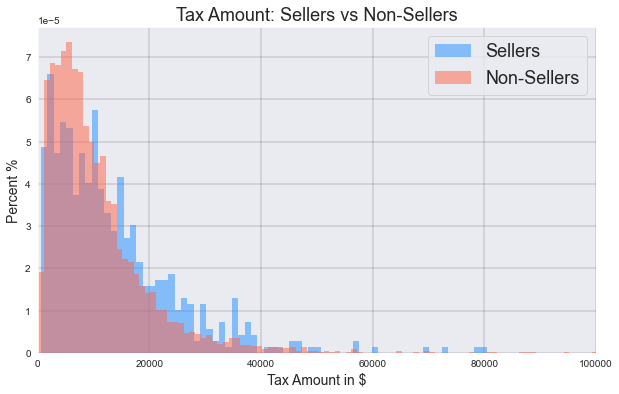

In [450]:
# 1. Tax Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(LF_Sellers_df['TAXAMT'], bins=70, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(LF_NonSellers_df['TAXAMT'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,100000)
plt.savefig('Los_Feliz_TaxAmount_DensityDistribution_SFR.png')

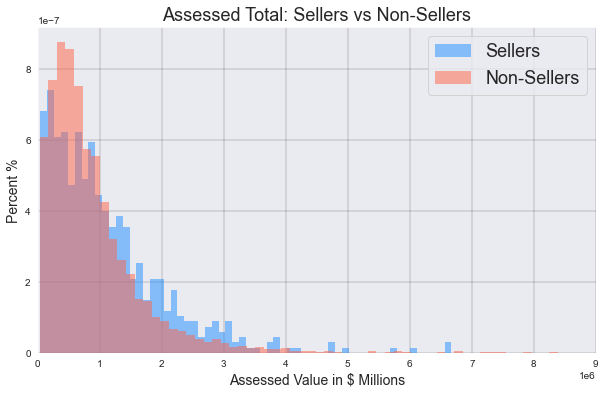

In [458]:
# 2. Assessed Total

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(LF_Sellers_df['ASSDTOTAL'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(LF_NonSellers_df['ASSDTOTAL'], bins=60, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,9000000)
plt.savefig('Los_Feliz_AssessedTotal_DensityDistribution_SFR.png')

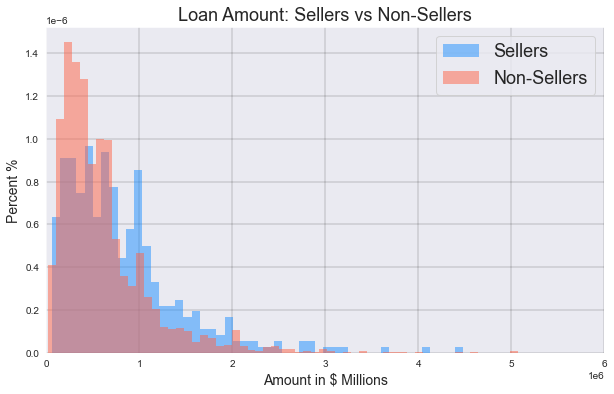

In [467]:
# 3. Loan Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(LF_Sellers_df['LOANAMOUT1'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(LF_NonSellers_df['LOANAMOUT1'], bins=200, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,6000000)
plt.savefig('Los_Feliz_LoanAmount_DensityDistribution_SFR.png')

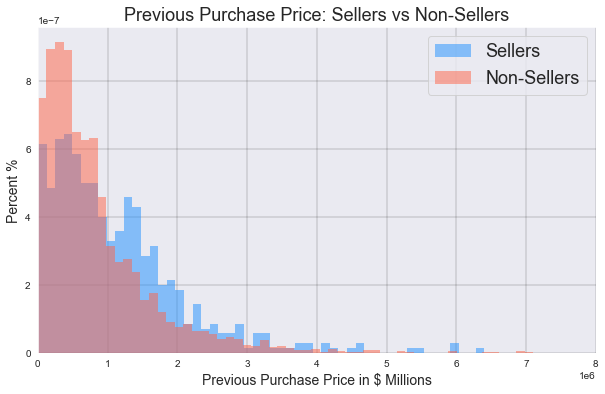

In [476]:
# 4. Price

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(LF_Sellers_df['PRICE'], bins=600, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(LF_NonSellers_df['PRICE'], bins=200, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Price: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Previous Purchase Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,8000000)
plt.savefig('Los_Feliz_PreviousPurchasePrice_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


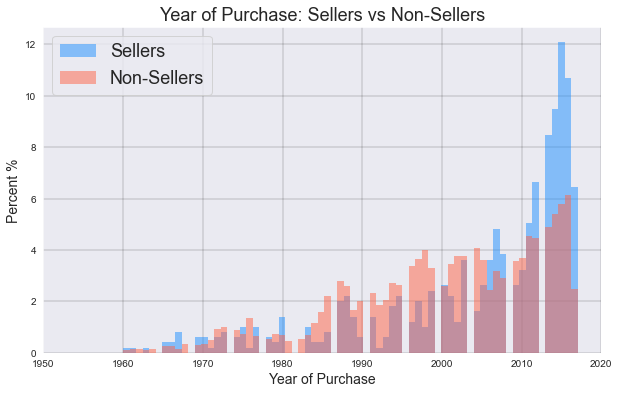

In [480]:
# 5. DODCATE_YEAR

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(LF_Sellers_df['DOCDATE_YEAR'], bins=70, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(LF_NonSellers_df['DOCDATE_YEAR'], bins=70, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_yticklabels([0,2,4,6,8,10,12])

ax.set_xlim(1950,2020)
plt.savefig('Los_Feliz_YearOfPurchase_DensityDistribution_SFR.png')